In [1]:
from NIDS import *

In [2]:
nids = NIDS_Manager("UNSW-NB15-BALANCED-TRAIN.csv", "LRCV", "attack_cat")

## Feature Analysis

### Label

In [3]:
# nids.rfecv_fit(nids.x, nids.y_label)
# label_selected_features = nids.rfecv_selected_features()
# print(label_selected_features)
# print(nids.rfecv_score(nids.x, nids.y_label))
# nids.rfecv_plot()

In [4]:
# nids.fa.rfecv[1].cv_results_["mean_test_score"]

### attack_cat

Index(['sport', 'dsport', 'sbytes', 'dbytes', 'sttl', 'service', 'Sload',
       'Dload', 'smeansz', 'dmeansz', 'Stime', 'Ltime', 'Sintpkt', 'synack',
       'ct_srv_dst'],
      dtype='object')
0.9656260352766703


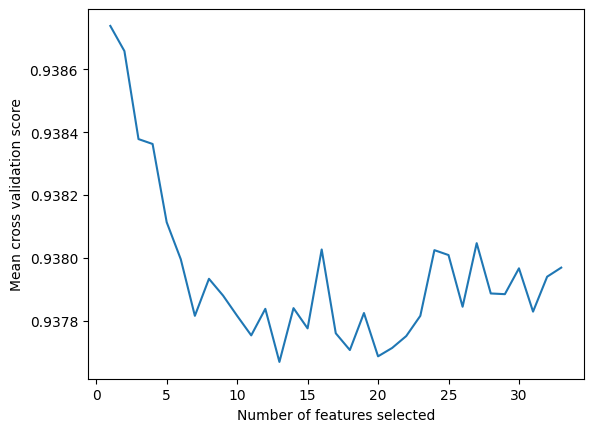

In [5]:
nids.rfecv_fit(nids.x, nids.y_attack_cat)
attack_selected_features = nids.rfecv_selected_features()
print(attack_selected_features)
print(nids.rfecv_score(nids.x, nids.y_attack_cat))
nids.rfecv_plot()

In [6]:
nids.fa.rfecv[1].cv_results_["mean_test_score"]

array([0.9387383 , 0.93865826, 0.93837811, 0.93836255, 0.93811352,
       0.93799568, 0.93781558, 0.93793343, 0.93788006, 0.93781558,
       0.93775333, 0.93783782, 0.93766884, 0.93784004, 0.93777556,
       0.93802681, 0.93776   , 0.93770664, 0.93782448, 0.93768663,
       0.93771331, 0.93775111, 0.93781558, 0.93802459, 0.93800902,
       0.93784449, 0.93804682, 0.93788673, 0.93788451, 0.93796678,
       0.93782893, 0.9379401 , 0.937969  ])

## Classification (Logistic Regression)

### Label

#### With feature selection

In [7]:
# log_lab_pred_fs, log_lab_score_fs = nids.run_logistic(nids.rfecv_x_specific_select(nids.x_train, label_selected_features), nids.rfecv_x_specific_select(nids.x_test, label_selected_features), nids.y_train_label, nids.y_test_label)
# log_lab_pred_fs, log_lab_score_fs

In [8]:
# nids.print_class_report(nids.y_test_label, log_lab_pred_fs)

#### Without feature selection

In [9]:
# log_lab_pred, log_lab_score = nids.run_logistic(nids.x_train, nids.x_test, nids.y_train_label, nids.y_test_label)
# log_lab_pred, log_lab_score

In [10]:
# nids.print_class_report(nids.y_test_label, log_lab_pred)

### attack_cat

#### With feature selection

In [11]:
log_atk_pred_fs, log_atk_score_fs = nids.run_logistic(nids.rfecv_x_specific_select(nids.x_train, attack_selected_features), nids.rfecv_x_specific_select(nids.x_test, attack_selected_features), nids.y_train_attack, nids.y_test_attack)
log_atk_pred_fs, log_atk_score_fs

(array(['', 'Generic', 'Generic', ..., '', '', ''], dtype=object),
 0.8998947586861141)

In [12]:
nids.print_class_report(nids.y_test_attack, log_atk_pred_fs)

Classification Report

                precision    recall  f1-score   support

                     0.96      0.98      0.97     67349
      Analysis       0.00      0.00      0.00       594
      Backdoor       0.00      0.00      0.00       377
     Backdoors       0.00      0.00      0.00       135
           DoS       0.36      0.20      0.26      3403
      Exploits       0.47      0.54      0.50      9300
       Fuzzers       0.62      0.61      0.61      5070
       Generic       0.99      0.98      0.98     45324
Reconnaissance       0.61      0.67      0.64      3005
     Shellcode       0.71      0.52      0.60       332
         Worms       0.67      0.05      0.10        39

      accuracy                           0.90    134928
     macro avg       0.49      0.41      0.42    134928
  weighted avg       0.89      0.90      0.89    134928



#### Without feature selection

In [13]:
# log_atk_pred, log_atk_score = nids.run_logistic(nids.x_train, nids.x_test, nids.y_train_attack, nids.y_test_attack)
# log_atk_pred, log_atk_score

In [14]:
# nids.print_class_report(nids.y_test_attack, log_atk_pred)

## Support Vector Classification (SVC)

In [15]:
nids.classifier_init('SVC')

0

### Label

In [16]:
# svc_label_pred, svc_label_score = nids.run_svc(nids.rfecv_x_specific_select(nids.x_train, label_selected_features), nids.rfecv_x_specific_select(nids.x_test, label_selected_features), nids.y_train_label, nids.y_test_label)
# svc_label_pred, svc_label_score

In [17]:
# nids.print_class_report(nids.y_test_label, svc_label_pred)

### attack_cat

In [18]:
svc_atk_pred, svc_atk_score = nids.run_svc(nids.rfecv_x_specific_select(nids.x_train, attack_selected_features), nids.rfecv_x_specific_select(nids.x_test, attack_selected_features), nids.y_train_attack, nids.y_test_attack)
svc_atk_pred, svc_atk_score

(array(['', 'Generic', 'Generic', ..., '', '', ''], dtype=object),
 0.8868285307719672)

In [19]:
nids.print_class_report(nids.y_test_attack, svc_atk_pred)

Classification Report

                precision    recall  f1-score   support

                     0.94      0.98      0.96     67349
      Analysis       0.00      0.00      0.00       594
      Backdoor       0.00      0.00      0.00       377
     Backdoors       0.00      0.00      0.00       135
           DoS       0.26      0.00      0.01      3403
      Exploits       0.40      0.47      0.43      9300
       Fuzzers       0.57      0.57      0.57      5070
       Generic       0.98      0.98      0.98     45324
Reconnaissance       0.58      0.57      0.58      3005
     Shellcode       0.61      0.69      0.65       332
         Worms       0.00      0.00      0.00        39

      accuracy                           0.89    134928
     macro avg       0.39      0.39      0.38    134928
  weighted avg       0.87      0.89      0.87    134928

